# Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline
from matplotlib import rcParams
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
#import sys
#sys.path.pop(0)

In [2]:
import batman
batman.__version__
#np.__version__

'2.4.7'

# Lets import our package 

In [3]:
import rmfit
rmfit

/Users/gks/opt/anaconda3/envs/py39/lib/python3.9/site-packages/autograd/numpy/numpy_wrapper.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  int_types = {_np.int, _np.int8, _np.int16, _np.int32, _np.int64, _np.integer}


<module 'rmfit' from '/Users/gks/Dropbox/mypylib/notebooks/GIT/rmfit/__init__.py'>

# Lets test it on a dataset with an RV variation + RM effect 

In [4]:
# Data from
# Albrecht et al. 2012
# https://ui.adsabs.harvard.edu/abs/2012ApJ...757...18A/abstract
df = pd.read_csv('../data/example/01_hatp2/albrecht2012.csv',comment='#',sep=';')
df.name.unique()
df = df[df.name=='HAT-P-2'].reset_index(drop=True)
df

,name,bjd,rv,f_RVel,e_rv,inst
0,HAT-P-2,2.454258e+06,107.29,NaN,11.47,HIRES
1,HAT-P-2,2.454258e+06,113.38,NaN,11.27,HIRES
2,HAT-P-2,2.454258e+06,102.73,NaN,11.29,HIRES
3,HAT-P-2,2.454258e+06,73.36,NaN,11.12,HIRES
4,HAT-P-2,2.454258e+06,72.43,NaN,10.98,HIRES
...,...,...,...,...,...,...
92,HAT-P-2,2.454258e+06,-278.41,NaN,10.80,HIRES
93,HAT-P-2,2.454258e+06,-297.41,NaN,10.85,HIRES
94,HAT-P-2,2.454258e+06,-350.56,NaN,11.02,HIRES
95,HAT-P-2,2.454258e+06,-352.35,NaN,11.08,HIRES


Text(0, 0.5, 'RV [m/s]')

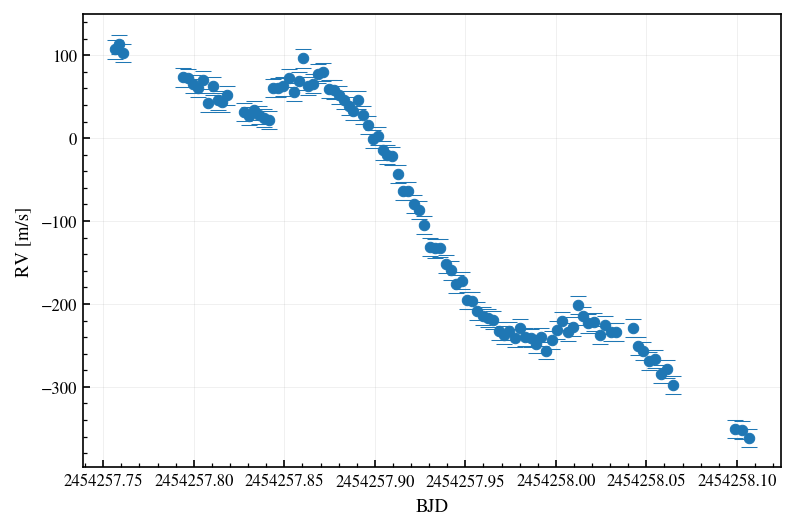

In [5]:
fig, ax = plt.subplots(dpi=150)
ax.errorbar(df.bjd.values,df.rv,df.e_rv,marker='o',lw=0,mew=0.5,capsize=4)
rmfit.utils.ax_apply_settings(ax,ticksize=8)
ax.set_xlabel('BJD')
ax.set_ylabel('RV [m/s]')

### Read priors from file 

In [6]:
f = '../data/example/01_hatp2/hatp2_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)

Reading in priorfile from ../data/example/01_hatp2/hatp2_priors.dat
   prior          arg1       arg2        label  description priortype  fixed
0     NP  2.454213e+06    0.00060        t0_p1        t0_p1     model  False
1     NP  5.633410e+00    0.00013         P_p1         P_p1     model  False
2     UP -1.800000e+02  180.00000       lam_p1       lam_p1     model  False
3     UP  0.000000e+00   30.00000        vsini        vsini     model  False
4     UP  8.500000e+01   90.00000       inc_p1       inc_p1     model  False
5     NP  7.227000e-02    0.00070         p_p1         p_p1     model  False
6     NP  9.000000e+00    3.00000         a_p1         a_p1     model  False
7     NP  3.000000e-01    0.05000           u1           u1     model  False
8     NP  3.000000e-01    0.05000           u2           u2     model  False
9     NP  5.010000e-01    0.00700       ecc_p1       ecc_p1     model  False
10    NP -1.726000e+02    1.60000     omega_p1     omega_p1     model  False
11    NP

In [7]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv  center_dist
0      t0_p1  2.454213e+06  2.454213e+06  2.454213e+06  2.454213e+06     0.000205
1       P_p1  5.633410e+00  5.632760e+00  5.634060e+00  5.633394e+00     0.000016
2     lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  8.517321e+00    -8.517321
3      vsini  1.500000e+01  0.000000e+00  3.000000e+01  1.676040e+01    -1.760397
4     inc_p1  8.750000e+01  8.500000e+01  9.000000e+01  8.924235e+01    -1.742348
5       p_p1  7.227000e-02  6.877000e-02  7.577000e-02  7.265287e-02    -0.000383
6       a_p1  9.000000e+00 -6.000000e+00  2.400000e+01  1.053778e+01    -1.537784
7         u1  3.000000e-01  5.000000e-02  5.500000e-01  3.279722e-01    -0.027972
8         u2  3.000000e-01  5.000000e-02  5.500000e-01  3.219568e-01    -0.021957
9     ecc_p1  5.010000e-01  4.660000e-01  5.360000e-01  4.963145e-01     0.004686
10  omega_p1 -1.726000e+02 -1.806000

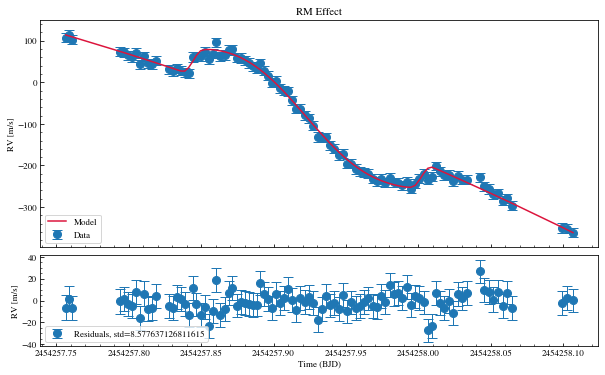

In [8]:
# plot best-fit
TF.plot_fit(TF.min_pv)

In [10]:
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)
TF.minimize_PyDE(mcmc=True,mc_iter=1000)

Reading in priorfile from ../data/example/01_hatp2/hatp2_priors.dat
   prior          arg1       arg2        label  description priortype  fixed
0     NP  2.454213e+06    0.00060        t0_p1        t0_p1     model  False
1     NP  5.633410e+00    0.00013         P_p1         P_p1     model  False
2     UP -1.800000e+02  180.00000       lam_p1       lam_p1     model  False
3     UP  0.000000e+00   30.00000        vsini        vsini     model  False
4     UP  8.500000e+01   90.00000       inc_p1       inc_p1     model  False
5     NP  7.227000e-02    0.00070         p_p1         p_p1     model  False
6     NP  9.000000e+00    3.00000         a_p1         a_p1     model  False
7     NP  3.000000e-01    0.05000           u1           u1     model  False
8     NP  3.000000e-01    0.05000           u2           u2     model  False
9     NP  5.010000e-01    0.00700       ecc_p1       ecc_p1     model  False
10    NP -1.726000e+02    1.60000     omega_p1     omega_p1     model  False
11    NP

No flatchain passed, defaulting to using full chains
Plotting curve with best-fit mcmc values


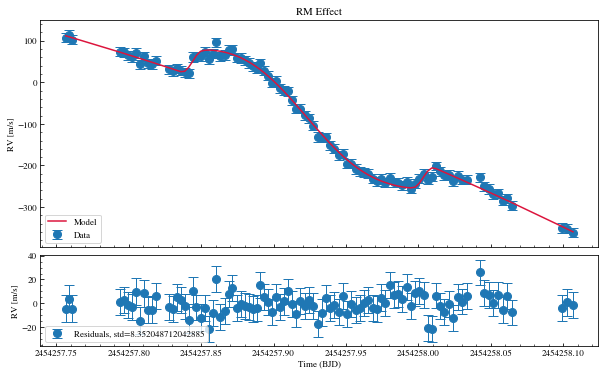

In [11]:
# Plot the MCMC fit
TF.plot_mcmc_fit()

In [12]:
# The min values are recorded in the following attribute
TF.min_pv_mcmc

array([ 2.45421286e+06,  5.63341572e+00,  6.07395173e+00,  1.69193297e+01,
        8.90008178e+01,  7.22266539e-02,  1.04915531e+01,  3.55351466e-01,
        3.26971039e-01,  4.96163403e-01, -1.70093983e+02,  5.02921732e+00,
        9.25287788e+02,  3.69708202e+02])

## Plot chains 

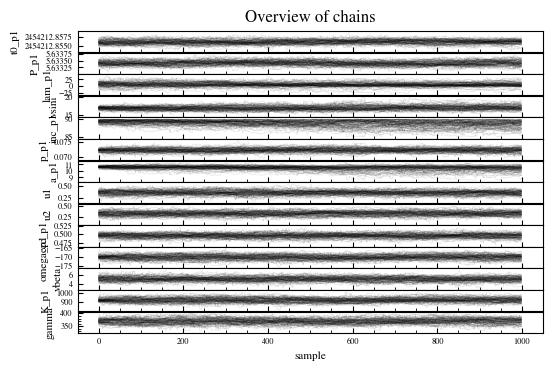

In [13]:
rmfit.mcmc_help.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)

## Plot corner

In [14]:
# Make flatchain and posteriors
burnin_index = 200
chains_after_burnin = TF.sampler.chain[:,burnin_index:,:]
flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))
df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)
df_post

,t0_p1,P_p1,lam_p1,vsini,inc_p1,p_p1,a_p1,u1,u2,ecc_p1,omega_p1,vbeta,K_p1,gamma
0,2.454213e+06,5.633476,17.817290,17.712622,89.158741,0.071918,10.389323,0.373303,0.282571,0.495533,-171.642031,5.085886,895.810364,356.398728
1,2.454213e+06,5.633454,14.673715,18.060202,88.787582,0.072219,10.571298,0.383492,0.231369,0.495110,-171.220734,5.279116,903.091995,359.944898
2,2.454213e+06,5.633453,14.588770,18.032715,88.795084,0.072208,10.568942,0.382985,0.233810,0.495295,-171.207783,5.276218,903.197661,360.101365
3,2.454213e+06,5.633453,14.588770,18.032715,88.795084,0.072208,10.568942,0.382985,0.233810,0.495295,-171.207783,5.276218,903.197661,360.101365
4,2.454213e+06,5.633453,14.588770,18.032715,88.795084,0.072208,10.568942,0.382985,0.233810,0.495295,-171.207783,5.276218,903.197661,360.101365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2.454213e+06,5.633498,12.438475,16.490344,88.689431,0.072884,10.496590,0.344288,0.304537,0.498715,-169.944118,5.222958,936.208046,378.879076
79996,2.454213e+06,5.633498,12.438475,16.490344,88.689431,0.072884,10.496590,0.344288,0.304537,0.498715,-169.944118,5.222958,936.208046,378.879076
79997,2.454213e+06,5.633502,12.716629,16.437535,88.728803,0.072925,10.516444,0.344999,0.303113,0.498815,-169.943003,5.217661,936.613422,379.191466
79998,2.454213e+06,5.633510,15.081554,16.638625,88.367778,0.072467,10.444502,0.347973,0.317001,0.497181,-170.557003,5.516693,943.176881,384.082097


In [15]:
# Assess convergence, should be close to 1 (usually within a few percent, if not, then rerun MCMC with more steps)
# This example for example would need a lot more steps, but keeping steps fewer for a quick minimal example
# Usually good to let it run for 10000 - 20000 steps for a 'production run'
rmfit.mcmc_help.gelman_rubin(chains_after_burnin)

array([1.17330681, 1.13782686, 1.20751875, 1.19600309, 1.32398636,
       1.12850044, 1.27215469, 1.1420341 , 1.16557982, 1.17748609,
       1.1399851 , 1.17490276, 1.11886769, 1.11995413])

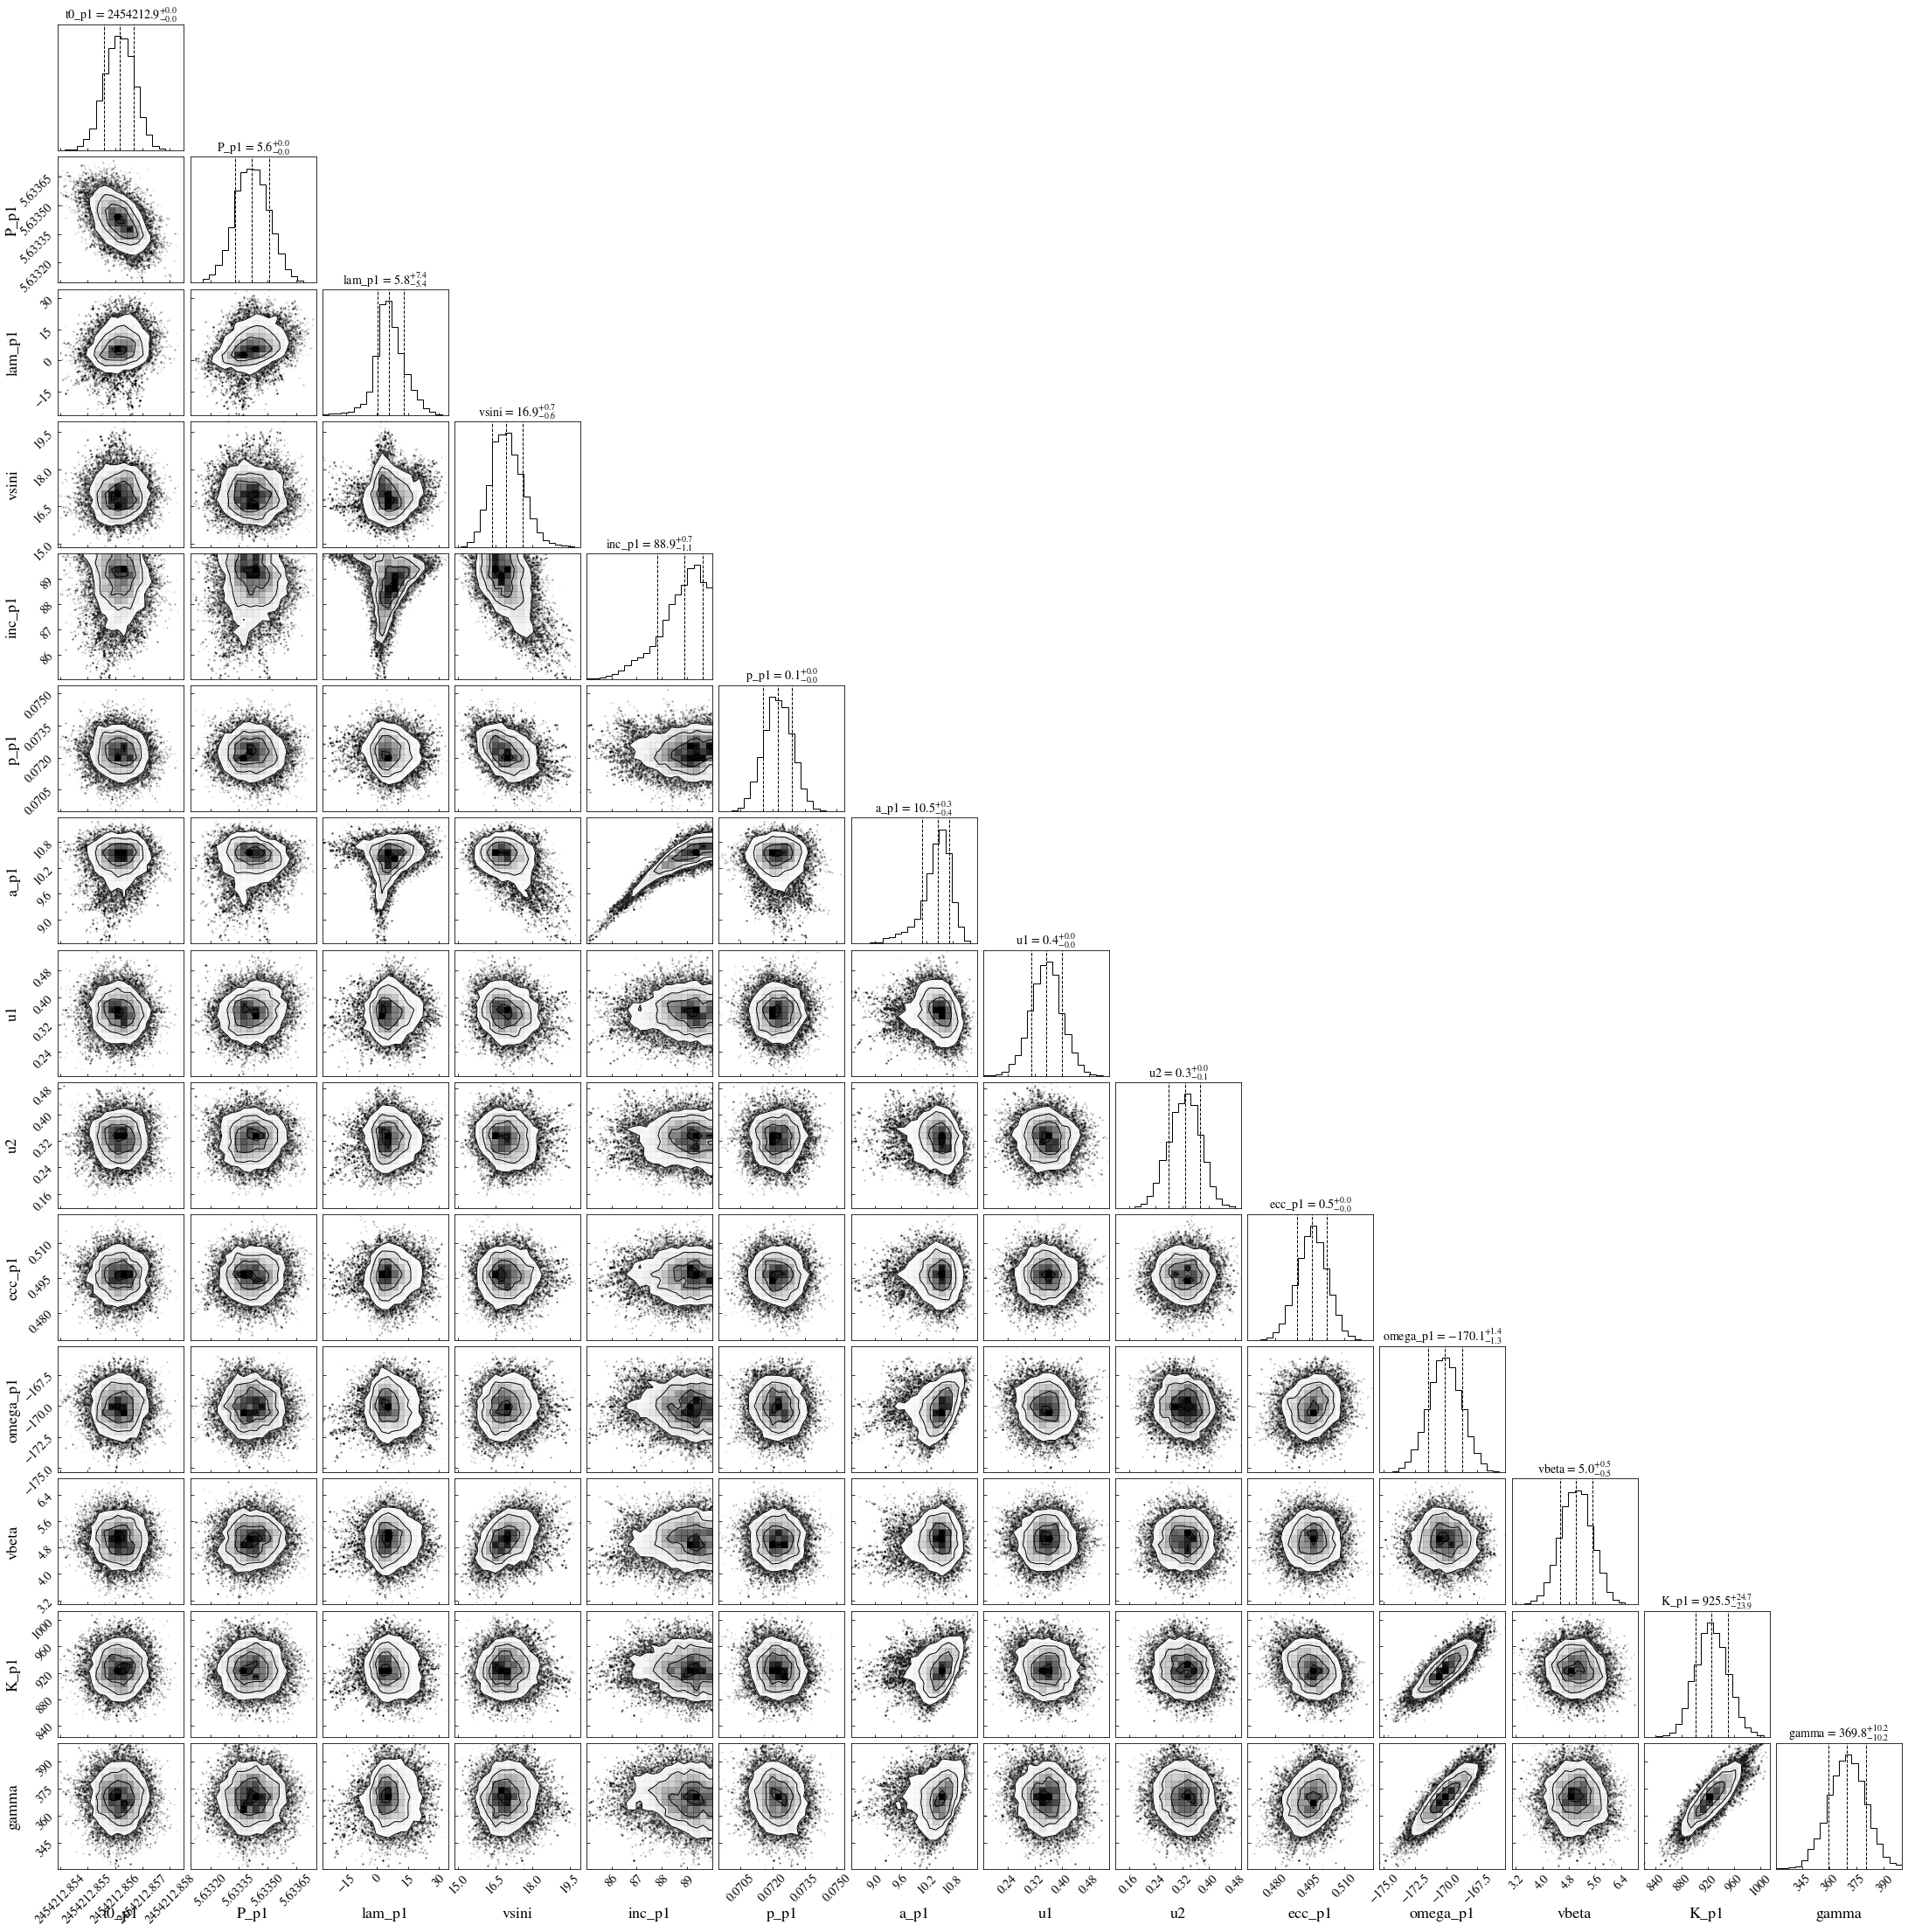

In [16]:
# Plot corner plot
fig = rmfit.mcmc_help.plot_corner(chains_after_burnin,
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions),title_fmt='.1f',xlabcord=(0.5, -0.2))

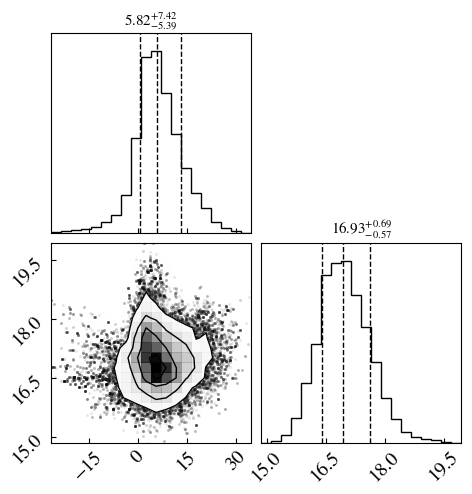

In [17]:
# Narrow down on the lambda and vsini
import corner
fig = corner.corner(df_post[['lam_p1','vsini']],show_titles=True,quantiles=[0.18,0.5,0.84])
fig.dpi=100

In [18]:
# Print median values
df_medvals = TF.get_mean_values_mcmc_posteriors(df_post.values)
df_medvals

,medvals,minus,plus,values,Labels,Description
0,2.454213e+06,0.000551,0.000534,$2454212.85616_{-0.00055}^{+0.00053}$,t0_p1,t0_p1
0,5.633417e+00,0.000087,0.000091,$5.633417_{-0.00009}^{+0.00009}$,P_p1,P_p1
0,5.823185e+00,5.392186,7.415181,$5.8_{-5.4}^{+7.4}$,lam_p1,lam_p1
0,1.693445e+01,0.572409,0.688399,$16.93_{-0.57}^{+0.69}$,vsini,vsini
0,8.890253e+01,1.086443,0.710309,$88.9_{-1.1}^{+0.71}$,inc_p1,inc_p1
0,7.223272e-02,0.000668,0.000681,$0.07223_{-0.00067}^{+0.00068}$,p_p1,p_p1
0,1.046657e+01,0.379265,0.255717,$10.47_{-0.38}^{+0.26}$,a_p1,a_p1
0,3.546293e-01,0.045822,0.044459,$0.355_{-0.046}^{+0.044}$,u1,u1
0,3.280584e-01,0.050380,0.046165,$0.328_{-0.050}^{+0.046}$,u2,u2
0,4.961253e-01,0.006723,0.006419,$0.4961_{-0.0067}^{+0.0064}$,ecc_p1,ecc_p1


# Plotting resulting MCMC fit 

Sampling, i= 0
Sampling, i= 100
Sampling, i= 200
Sampling, i= 300


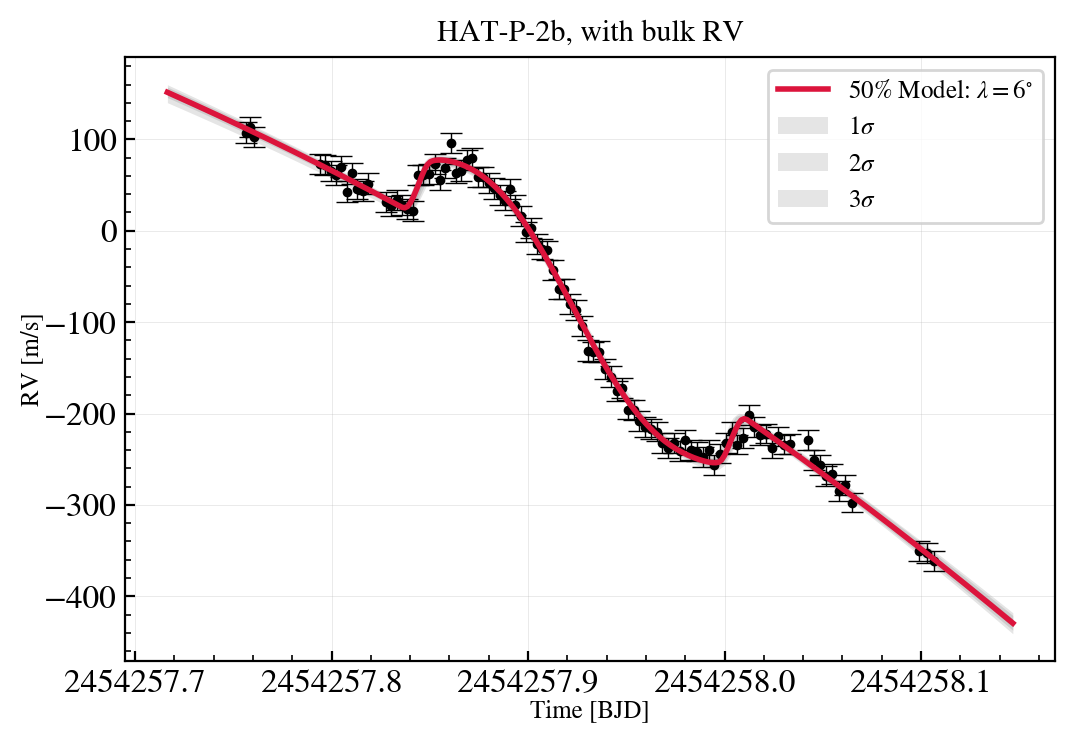

In [19]:
TITLE = 'HAT-P-2b, with bulk RV'
NUMMODELS = 400
shadecolor="black"

###################
times1 = np.linspace(TF.lpf.data['x'][0]-0.02,TF.lpf.data['x'][-1]+0.02,500)
pv_50 = np.percentile(flatchain,[50],axis=0)[0]
t1_mod = np.linspace(times1.min()-0.02,times1.max()+0.02,300)
rv_50 = TF.lpf.compute_total_model(pv_50,t1_mod)

# Plot random samples
fig, ax = plt.subplots(dpi=200)

#################
# Plot data
#################
markercolor="black"
ax.errorbar(TF.lpf.data['x'],TF.lpf.data['y'],TF.lpf.data['error'],
            marker='o',elinewidth=0.5,capsize=4,lw=0,mew=0.5,color=markercolor,markersize=3)
ax.plot(t1_mod,rv_50,color="crimson",
        label=r'50% Model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$',lw=2.,zorder=10)

#################
# Sample models
#################
mmodel1 = []
for i in range(NUMMODELS):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_total_model(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)
mmodel1 = np.array(mmodel1)
#################

ax.fill_between(t1_mod,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)
ax.legend(loc='upper right')
ax.set_xlabel('Time [BJD]',labelpad=0)
ax.set_ylabel('RV [m/s]',labelpad=0)
ax.set_title(TITLE)
rmfit.utils.ax_apply_settings(ax)